<a href="https://colab.research.google.com/github/NanduS22/DeepLearning/blob/main/DeepLearningAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##HAND GESTURE RECOGNITION USING XCEPTION NET

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d gti-upm/leapgestrecog

100% 2.13G/2.13G [01:51<00:00, 22.6MB/s]
100% 2.13G/2.13G [01:51<00:00, 20.4MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/leapgestrecog.zip","r")
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#importing necesssary header files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import tensorflow as tf


In [ ]:
import keras
import warnings
warnings.filterwarnings('ignore')
import cv2

In [ ]:
CATEGORIES = ['01_palm','02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']

IMG_SIZE = 100

#paths for dataset

data_path = "/content/leapgestrecog/leapGestRecog"

##Loading images

In [ ]:
# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                img_arr_rgb = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
                image_data.append([cv2.resize(img_arr_rgb, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass

In [ ]:
image_data[0]

[array([[[5, 5, 5],
         [5, 5, 5],
         [4, 4, 4],
         ...,
         [4, 4, 4],
         [4, 4, 4],
         [4, 4, 4]],
 
        [[5, 5, 5],
         [4, 4, 4],
         [4, 4, 4],
         ...,
         [4, 4, 4],
         [5, 5, 5],
         [3, 3, 3]],
 
        [[4, 4, 4],
         [5, 5, 5],
         [5, 5, 5],
         ...,
         [4, 4, 4],
         [4, 4, 4],
         [4, 4, 4]],
 
        ...,
 
        [[6, 6, 6],
         [5, 5, 5],
         [6, 6, 6],
         ...,
         [5, 5, 5],
         [5, 5, 5],
         [4, 4, 4]],
 
        [[6, 6, 6],
         [5, 5, 5],
         [5, 5, 5],
         ...,
         [4, 4, 4],
         [4, 4, 4],
         [4, 4, 4]],
 
        [[5, 5, 5],
         [5, 5, 5],
         [5, 5, 5],
         ...,
         [4, 4, 4],
         [5, 5, 5],
         [7, 7, 7]]], dtype=uint8),
 0]

In [ ]:
#shuffle the data

import random
random.shuffle(image_data)

In [ ]:
input_data = []
label = []
for X, y in image_data[:5000]:
  input_data.append(X)
  label.append(y)

In [ ]:
input_data[10]

array([[[3, 3, 3],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[5, 5, 5],
        [6, 6, 6],
        [4, 4, 4],
        ...,
        [3, 3, 3],
        [4, 4, 4],
        [3, 3, 3]],

       [[4, 4, 4],
        [6, 6, 6],
        [5, 5, 5],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       ...,

       [[8, 8, 8],
        [7, 7, 7],
        [8, 8, 8],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[6, 6, 6],
        [7, 7, 7],
        [8, 8, 8],
        ...,
        [4, 4, 4],
        [3, 3, 3],
        [4, 4, 4]],

       [[7, 7, 7],
        [8, 8, 8],
        [8, 8, 8],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [7, 7, 7]]], dtype=uint8)

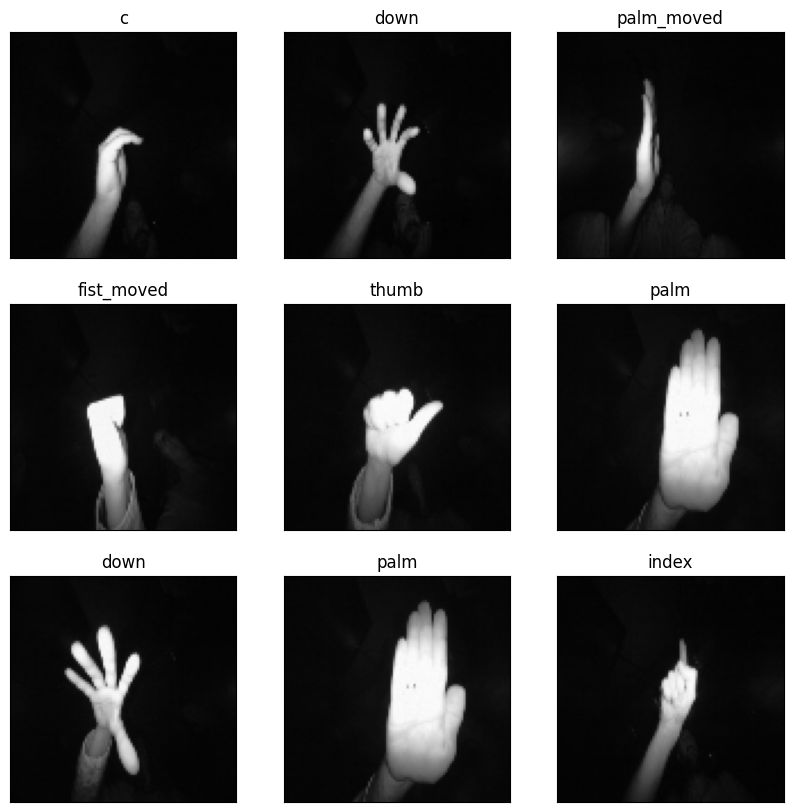

In [ ]:
label[:10]
plt.figure(1, figsize=(10, 10))
for i in range(1, 10):
  plt.subplot(3, 3, i)
  plt.imshow(image_data[i][0], cmap="hot")
  plt.xticks([])
  plt.yticks([])
  plt.title(CATEGORIES[label[i]][3:])

plt.show()


In [ ]:
input_data = np.array(input_data)
label = np.array(label)
input = input_data/100
input_data.shape

(5000, 100, 100, 3)

In [ ]:
#one hot econding
label = keras.utils.to_categorical(label[:5000], num_classes=10, dtype = 'i1')
label[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int8)

In [ ]:
label.shape

(5000, 10)

In [ ]:
#reshaping data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 3)

In [ ]:
input_data.shape

(5000, 100, 100, 3)

In [ ]:
new_input_data = input_data[:5000]

In [ ]:
new_input_data.shape

(5000, 100, 100, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_input_data, label, test_size = 0.3, random_state = 0)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import Xception

# Load the Xception model with pre-trained weights (include_top=False for feature extraction)
xc = Xception(weights='imagenet',input_shape=(100,100,3), include_top=False)

xc.summary()

83683744/83683744 [==============================] - 5s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 49, 49, 32)           864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 49, 49, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activat

In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
num_classes_task1 = 10

In [ ]:
x_task1 = xc.output
x_task1 = GlobalAveragePooling2D()(x_task1)
predictions_task1 = Dense(num_classes_task1, activation='softmax')(x_task1)

In [ ]:
model = Model(inputs=xc.input, outputs=[predictions_task1])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 49, 49, 32)           864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 49, 49, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 49, 49, 32)           0         ['block1_conv1_bn[0][0]'] 

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#Adam(learning_rate=0.9)
#SGD(learning_rate= ,momentum=)

In [ ]:
#  with tf.device('/device:GPU:0'):
#     random_image_gpu = tf.random.normal((100, 100, 100, 3))
#     net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
#     return tf.math.reduce_sum(net_gpu)


In [ ]:
X_train.shape

(3500, 100, 100, 3)

In [ ]:
X_test.shape

(1500, 100, 100, 3)

In [ ]:
y_train.shape,  y_test.shape

((3500, 10), (1500, 10))

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
history = model.fit(X_train, y_train, epochs = 10, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/10
219/219 [==============================] - 55s 75ms/step - loss: 0.6086 - accuracy: 0.8197 - val_loss: 1.4942 - val_accuracy: 0.7073
Epoch 2/10
219/219 [==============================] - 14s 64ms/step - loss: 0.0774 - accuracy: 0.9771 - val_loss: 0.0206 - val_accuracy: 0.9973
Epoch 3/10
219/219 [==============================] - 14s 64ms/step - loss: 0.0924 - accuracy: 0.9763 - val_loss: 1.8538 - val_accuracy: 0.6487
Epoch 4/10
219/219 [==============================] - 14s 65ms/step - loss: 0.0569 - accuracy: 0.9860 - val_loss: 0.0521 - val_accuracy: 0.9893
Epoch 5/10
219/219 [==============================] - 15s 67ms/step - loss: 0.0459 - accuracy: 0.9886 - val_loss: 0.0376 - val_accuracy: 0.9947
Epoch 6/10
219/219 [==============================] - 15s 67ms/step - loss: 0.0400 - accuracy: 0.9894 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 7/10
219/219 [==============================] - 16s 73ms/step - loss: 0.0076 - accuracy: 0.9989 - val_loss: 2.2745e-05 - val_accur

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

47/47 [==============================] - 2s 38ms/step - loss: 0.2359 - accuracy: 0.9807
Test accuracy: 98.07%


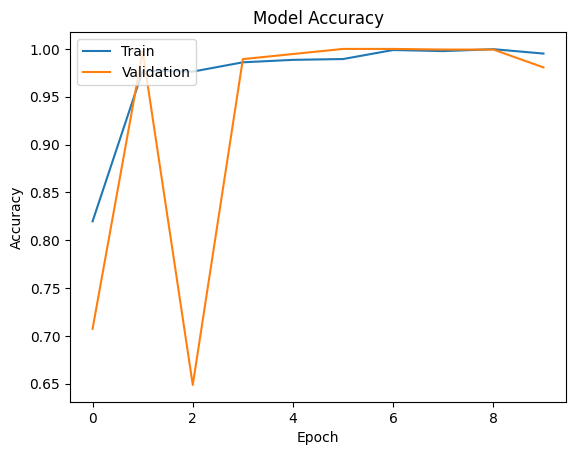

In [ ]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()